In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,20)

In [2]:
df1 = pd.read_csv('Pakistan_estate.csv')
df1.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [3]:
df1.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [4]:
df2 = df1.drop(['property_id','location_id','location','purpose','date_added','agency','agent','page_url'],axis='columns')
df2.head()

,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,2,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,3,15246.056
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,5,2178.008
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,4,10890.000
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,3,2178.008


In [5]:
df2.isnull().sum()

property_type    0
price            0
city             0
province_name    0
latitude         0
longitude        0
baths            0
bedrooms         0
Total_Area       0
dtype: int64

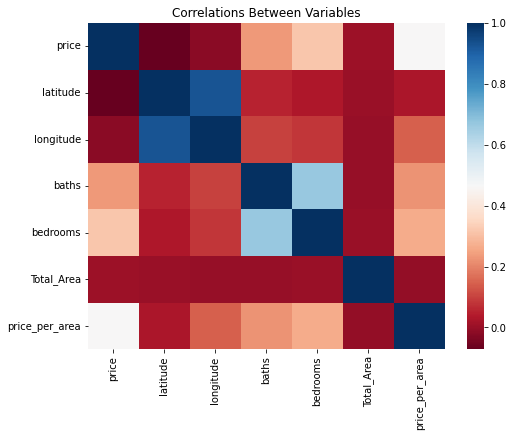

In [18]:
import seaborn as sns 
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=12)
plt.show()

<AxesSubplot:xlabel='city', ylabel='count'>

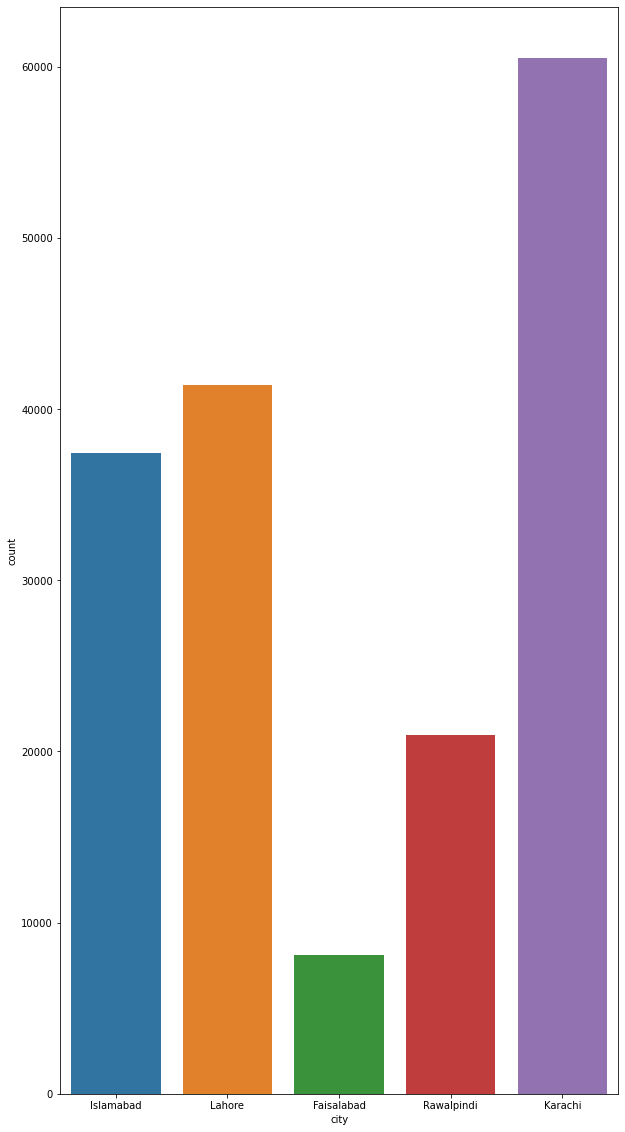

In [20]:
sns.countplot(x ='city', data = df2)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

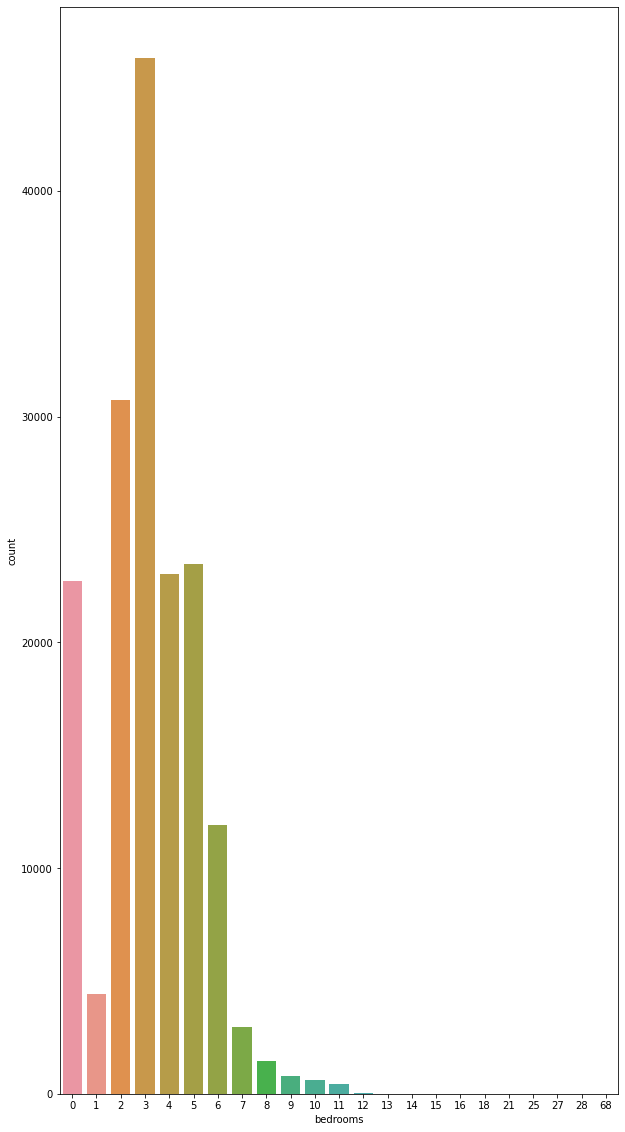

In [22]:
sns.countplot(x ='bedrooms', data = df2)

<AxesSubplot:xlabel='baths', ylabel='count'>

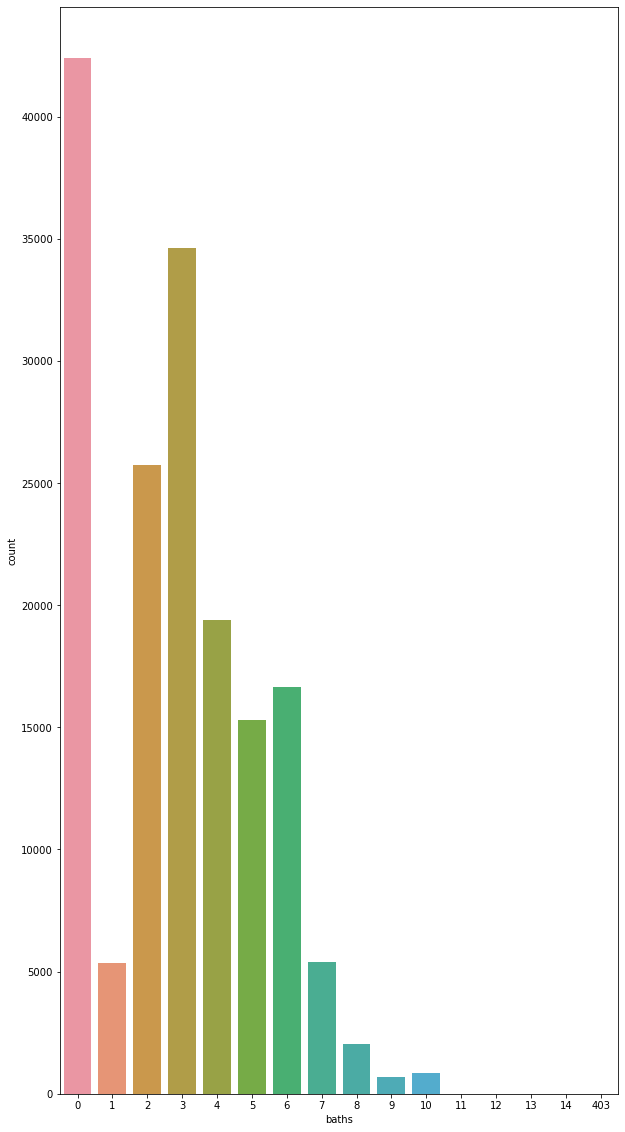

In [23]:
sns.countplot(x ='baths', data = df2)

<AxesSubplot:xlabel='province_name', ylabel='count'>

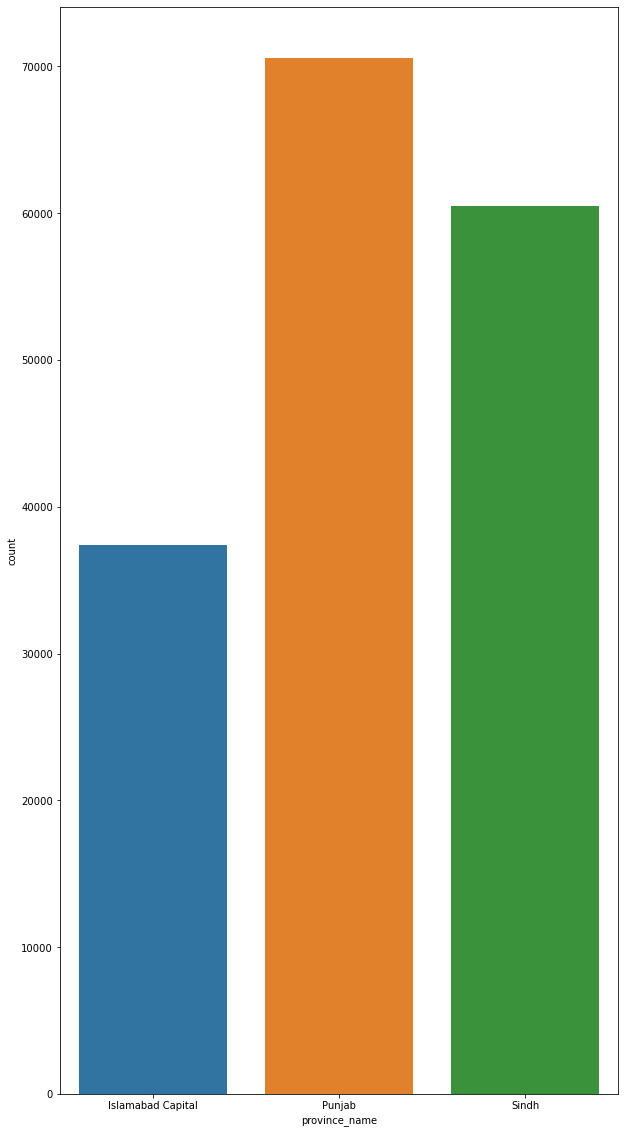

In [24]:
sns.countplot(x ='province_name', data = df2)

<AxesSubplot:xlabel='property_type', ylabel='count'>

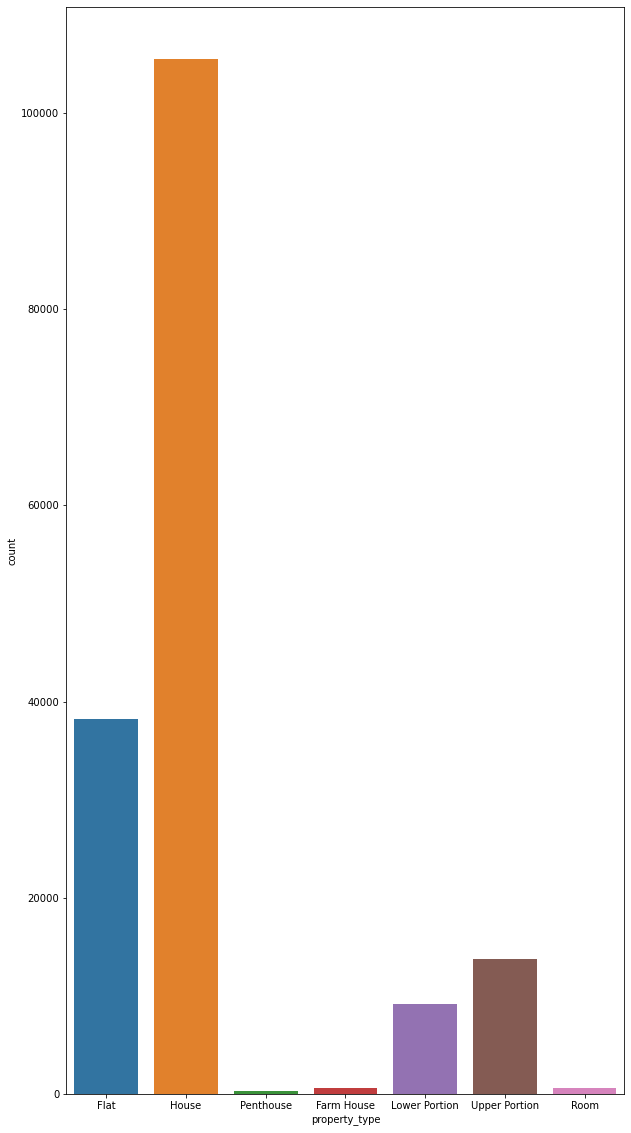

In [25]:
sns.countplot(x ='property_type', data = df2)

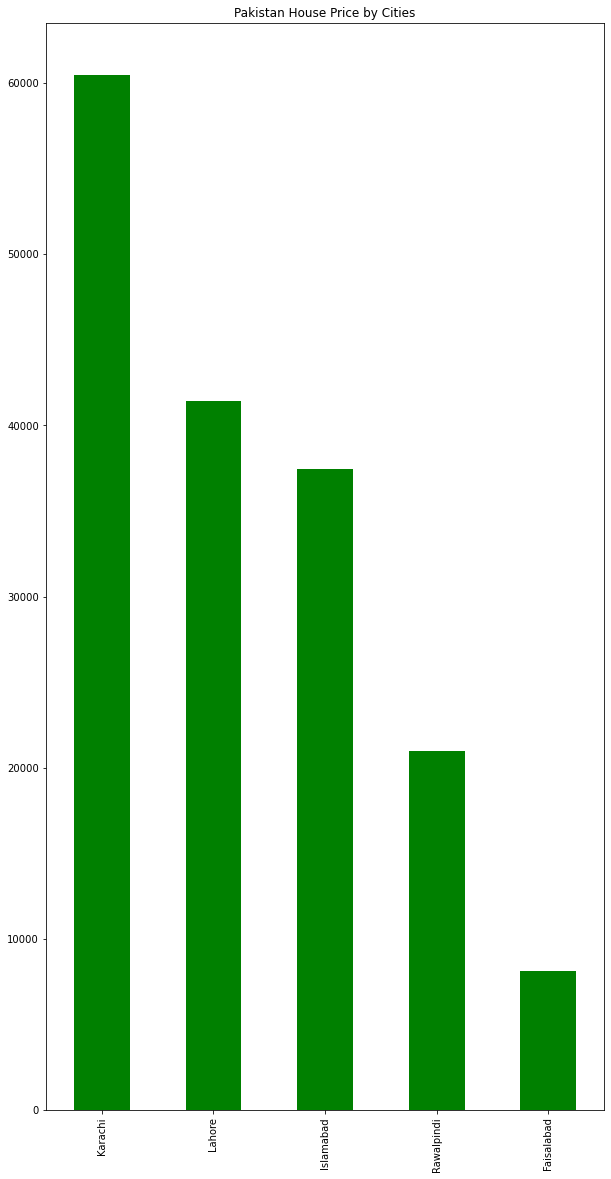

In [27]:
df2['city'].value_counts().head(10).plot(kind='bar', color='g')
plt.title('Pakistan House Price by Cities');

In [7]:
df2.groupby('city')['city'].agg('count')

city
Faisalabad     8133
Islamabad     37426
Karachi       60484
Lahore        41427
Rawalpindi    20976
Name: city, dtype: int64

In [8]:
df2.groupby('property_type')['property_type'].agg('count')

property_type
Farm House          657
Flat              38238
House            105468
Lower Portion      9229
Penthouse           395
Room                685
Upper Portion     13774
Name: property_type, dtype: int64

In [9]:
df2['price_per_area'] = df2['price']/df2['Total_Area']
df2

,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,Total_Area,price_per_area
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,2,1089.004,9182.702727
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,3,15246.056,452.576063
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,5,2178.008,7575.729749
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,4,10890.000,3994.490358
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,3,2178.008,3213.945954
...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Karachi,Sindh,25.029909,67.137192,0,6,26136.096,1013.923426
168442,House,12500000,Karachi,Sindh,25.017951,67.136393,0,3,2178.008,5739.189204
168443,House,27000000,Karachi,Sindh,25.015384,67.116330,0,6,26136.096,1033.054057
168444,House,11000000,Karachi,Sindh,25.013265,67.120818,0,3,21235.578,517.998615


In [10]:
property_type_n = []
city_n = []
province_n = []
for pt,c,p in zip(df2.property_type,df2.city,df2.province_name):
    if pt == 'Flat':
        property_type_n.append(1)
    elif pt == 'House':
        property_type_n.append(2)
    elif pt == 'Penthouse':
        property_type_n.append(3)
    elif pt == 'Farm House':
        property_type_n.append(4)
    elif pt == 'Room':
        property_type_n.append(5)
    elif pt == 'Lower Portion':
        property_type_n.append(6)
    elif pt == 'Upper Portion':
        property_type_n.append(7)
    

    if c == 'Islamabad':
        city_n.append(1)
    elif c == 'Karachi':
        city_n.append(2)
    elif c == 'Lahore':
        city_n.append(3)
    elif c == 'Rawalpindi':
        city_n.append(4)
    elif c == 'Faisalabad':
        city_n.append(5)
    
    if p == 'Islamabad Capital':
        province_n.append(1)
    elif p == 'Punjab':
        province_n.append(2)
    elif p == 'Sindh':
        province_n.append(3)

In [11]:
df3 = df2.drop(['property_type','city','province_name','price_per_area'],axis='columns')
df3.head()

,price,latitude,longitude,baths,bedrooms,Total_Area
0,10000000,33.679890,73.012640,2,2,1089.004
1,6900000,33.700993,72.971492,3,3,15246.056
2,16500000,33.631486,72.926559,6,5,2178.008
3,43500000,33.707573,73.151199,4,4,10890.000
4,7000000,33.492591,73.301339,3,3,2178.008


In [12]:
df3['city_n'] = city_n
df3['poperty_type_n'] = property_type_n
df3['province_name'] = province_n
df3.head()

,price,latitude,longitude,baths,bedrooms,Total_Area,city_n,poperty_type_n,province_name
0,10000000,33.679890,73.012640,2,2,1089.004,1,1,1
1,6900000,33.700993,72.971492,3,3,15246.056,1,1,1
2,16500000,33.631486,72.926559,6,5,2178.008,1,2,1
3,43500000,33.707573,73.151199,4,4,10890.000,1,2,1
4,7000000,33.492591,73.301339,3,3,2178.008,1,2,1


In [13]:
X = df3.drop(['price'],axis='columns')
y = df3.price

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [16]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.12360724744555485

In [ ]:
# Use K Fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

In [124]:
# Find best model using GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.171e+19, tolerance: 2.100e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

,model,best_score,best_params
0,linear_regression,0.115985,{'normalize': False}
1,lasso,0.115985,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.367437,"{'criterion': 'mse', 'splitter': 'random'}"


In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.predict(X_test)

In [ ]:
model.score(X_test,y_test)